# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import module

In [ ]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
from keras.layers import *

In [ ]:
!pip install pyvi
from pyvi import ViTokenizer, ViPosTagger
from tqdm import tqdm
import numpy as np
import gensim
import numpy as np
import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.5 MB 4.4 MB/s 
     |████████████████████████████████| 965 kB 54.7 MB/s 


# Dataset

In [ ]:
import os 
# dir_path = os.path.dirname(os.path.realpath(os.getcwd()))
# dir_path = os.path.join(dir_path, 'Data')

def get_data(folder_path):
    X = []
    y = []
    dirs = os.listdir(folder_path)
    for path in tqdm(dirs):
        file_paths = os.listdir(os.path.join(folder_path, path))
        for file_path in tqdm(file_paths):
            with open(os.path.join(folder_path, path, file_path), 'r', encoding="utf-16") as f:
                lines = f.readlines()
                lines = ' '.join(lines)
                lines = gensim.utils.simple_preprocess(lines)
                lines = ' '.join(lines)
                lines = ViTokenizer.tokenize(lines)

                X.append(lines)
                y.append(path)

    return X, y

## unrar file

In [ ]:
!unrar x -Y "/content/drive/MyDrive/0ML/phanloaitailieu/VNTC-master/Data/10Topics/Ver1.1/Train_Ful.rar" "/content/drive/MyDrive/0ML/phanloaitailieu/VNTC-master/Data/10Topics/Ver1.1/"

Streaming output truncated to the last 5000 lines.
Extracting  /content/drive/MyDrive/0ML/phanloaitailieu/VNTC-master/Data/10Topics/Ver1.1/Train_Ful/Van hoa/VH_VNE_T_ (9175).txt      90%  OK 
Extracting  /content/drive/MyDrive/0ML/phanloaitailieu/VNTC-master/Data/10Topics/Ver1.1/Train_Ful/Van hoa/VH_VNE_T_ (9177).txt      90%  OK 
Extracting  /content/drive/MyDrive/0ML/phanloaitailieu/VNTC-master/Data/10Topics/Ver1.1/Train_Ful/Van hoa/VH_VNE_T_ (9179).txt      90%  OK 
Extracting  /content/drive/MyDrive/0ML/phanloaitailieu/VNTC-master/Data/10Topics/Ver1.1/Train_Ful/Van hoa/VH_VNE_T_ (9180).txt      90%  OK 
Extracting  /content/drive/MyDrive/0ML/phanloaitailieu/VNTC-master/Data/10Topics/Ver1.1/Train_Ful/Van hoa/VH_VNE_T_ (9182).txt      90%  OK 
Extracting  /content/drive/MyDrive/0ML/phanloaitailieu/VNTC-master/Data/10Topics/Ver1.1/Train_Ful/Van hoa/VH_VNE_T_ (9184).txt      90%  OK 
Extracting  /content/drive/MyDrive/0ML/phanloaita

In [ ]:
# !unrar x -Y "/content/drive/MyDrive/0ML/phanloaitailieu/VNTC-master/Data/10Topics/Ver1.1/Test_Full.rar" "/content/drive/MyDrive/0ML/phanloaitailieu/VNTC-master/Data/10Topics/Ver1.1/"

## Train file

### Get data

In [ ]:
# train_path = os.path.join(dir_path, '/content/drive/MyDrive/0ML/phanloaitailieu/VNTC-master/Data/10Topics/Ver1.1/Train_Full')
# train_path = os.path.join('/content/drive/MyDrive/0ML/phanloaitailieu/VNTC-master/Data/10Topics/Ver1.1/Train_Ful')
# X_data, y_data = get_data(train_path)

Streaming output truncated to the last 5000 lines.
100%|██████████| 10/10 [14:57<00:00, 89.74s/it] 


### Dump data to file .pkl

In [ ]:
pickle.dump(X_data, open('/content/drive/MyDrive/0ML/phanloaitailieu/Text Classifier/data/X_data.pkl', 'wb'))
pickle.dump(y_data, open('/content/drive/MyDrive/0ML/phanloaitailieu/Text Classifier/data/y_data.pkl', 'wb'))

## Test file

### Get data

In [ ]:
# import os
# test_path = os.path.join('/content/drive/MyDrive/0ML/phanloaitailieu/VNTC-master/Data/10Topics/Ver1.1/Test_Full')
# X_test, y_test = get_data(test_path)

 60%|██████    | 6/10 [18:54<15:09, 227.48s/it]
0it [00:00, ?it/s]

 90%|█████████ | 9/10 [23:26<02:29, 149.95s/it]
0it [00:00, ?it/s]
100%|██████████| 10/10 [23:26<00:00, 140.63s/it]


### Dump test data to file .pkl

In [ ]:
# pickle.dump(X_test, open('/content/drive/MyDrive/0ML/phanloaitailieu/Text Classifier/data/X_test.pkl', 'wb'))
# pickle.dump(y_test, open('/content/drive/MyDrive/0ML/phanloaitailieu/Text Classifier/data/y_test.pkl', 'wb'))

# Xử lý dữ liệu train text

In [ ]:
import regex as re

uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"

def remove_html(txt):
    return re.sub(r'<[^>]*>', '', txt)

def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
 
dicchar = loaddicchar()
 
# Đưa toàn bộ dữ liệu qua hàm này để chuẩn hóa lại
def covert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

def chuan_hoa_dau_tu_tieng_viet(word):
    if not is_valid_vietnam_word(word):
        return word
 
    chars = list(word)
    dau_cau = 0
    nguyen_am_index = []
    qu_or_gi = False
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x == -1:
            continue
        elif x == 9:  # check qu
            if index != 0 and chars[index - 1] == 'q':
                chars[index] = 'u'
                qu_or_gi = True
        elif x == 5:  # check gi
            if index != 0 and chars[index - 1] == 'g':
                chars[index] = 'i'
                qu_or_gi = True
        if y != 0:
            dau_cau = y
            chars[index] = bang_nguyen_am[x][0]
        if not qu_or_gi or index != 1:
            nguyen_am_index.append(index)
    if len(nguyen_am_index) < 2:
        if qu_or_gi:
            if len(chars) == 2:
                x, y = nguyen_am_to_ids.get(chars[1])
                chars[1] = bang_nguyen_am[x][dau_cau]
            else:
                x, y = nguyen_am_to_ids.get(chars[2], (-1, -1))
                if x != -1:
                    chars[2] = bang_nguyen_am[x][dau_cau]
                else:
                    chars[1] = bang_nguyen_am[5][dau_cau] if chars[1] == 'i' else bang_nguyen_am[9][dau_cau]
            return ''.join(chars)
        return word
 
    for index in nguyen_am_index:
        x, y = nguyen_am_to_ids[chars[index]]
        if x == 4 or x == 8:  # ê, ơ
            chars[index] = bang_nguyen_am[x][dau_cau]
            # for index2 in nguyen_am_index:
            #     if index2 != index:
            #         x, y = nguyen_am_to_ids[chars[index]]
            #         chars[index2] = bang_nguyen_am[x][0]
            return ''.join(chars)
 
    if len(nguyen_am_index) == 2:
        if nguyen_am_index[-1] == len(chars) - 1:
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            chars[nguyen_am_index[0]] = bang_nguyen_am[x][dau_cau]
            # x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            # chars[nguyen_am_index[1]] = bang_nguyen_am[x][0]
        else:
            # x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            # chars[nguyen_am_index[0]] = bang_nguyen_am[x][0]
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    else:
        # x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
        # chars[nguyen_am_index[0]] = bang_nguyen_am[x][0]
        x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
        chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
        # x, y = nguyen_am_to_ids[chars[nguyen_am_index[2]]]
        # chars[nguyen_am_index[2]] = bang_nguyen_am[x][0]
    return ''.join(chars)
 
 
def is_valid_vietnam_word(word):
    chars = list(word)
    nguyen_am_index = -1
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x != -1:
            if nguyen_am_index == -1:
                nguyen_am_index = index
            else:
                if index - nguyen_am_index != 1:
                    return False
                nguyen_am_index = index
    return True
 
 
def chuan_hoa_dau_cau_tieng_viet(sentence):
    """
        Chuyển câu tiếng việt về chuẩn gõ dấu kiểu cũ.
        :param sentence:
        :return:
        """
    sentence = sentence.lower()
    words = sentence.split()
    for index, word in enumerate(words):
        cw = re.sub(r'(^\p{P}*)([p{L}.]*\p{L}+)(\p{P}*$)', r'\1/\2/\3', word).split('/')
        # print(cw)
        if len(cw) == 3:
            cw[1] = chuan_hoa_dau_tu_tieng_viet(cw[1])
        words[index] = ''.join(cw)
    return ' '.join(words)



In [ ]:
def preprocessing_doc(doc):
    # xóa html code
    doc = remove_html(doc)
    # chuẩn hóa unicode
    doc = convert_unicode(doc)
    # chuẩn hóa cách gõ dấu tiếng Việt
    doc = chuan_hoa_dau_cau_tieng_viet(doc)
    # tách từ
    doc = word_tokenize(doc, format="text")
    # đưa về lower
    doc = doc.lower()
    # xóa các ký tự không cần thiết
    doc = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',doc)
    # xóa khoảng trắng thừa
    doc = re.sub(r'\s+', ' ', doc).strip()
    return doc
    

In [ ]:
import pickle

X_data = pickle.load(open('/content/drive/MyDrive/0ML/phanloaitailieu/Text Classifier/data/X_data.pkl', 'rb'))
y_data = pickle.load(open('/content/drive/MyDrive/0ML/phanloaitailieu/Text Classifier/data/y_data.pkl', 'rb'))

X_test = pickle.load(open('/content/drive/MyDrive/0ML/phanloaitailieu/Text Classifier/data/X_test.pkl', 'rb'))
y_test = pickle.load(open('/content/drive/MyDrive/0ML/phanloaitailieu/Text Classifier/data/y_test.pkl', 'rb'))

## TF-IDF

### Word Level TF-IDF
| Thực hiện tính toán dựa trên mỗi thành phần là một từ riêng lẻ.

In [ ]:
# word level - we choose max number of words equal to 30000 except all words (100k+ words)
tfidf_vect = TfidfVectorizer(analyzer='word', max_features=30000)
tfidf_vect.fit(X_data) # learn vocabulary and idf from training set
X_data_tfidf =  tfidf_vect.transform(X_data)
# assume that we don't have test set before
X_test_tfidf =  tfidf_vect.transform(X_test)

### N-gram Level TF-IDF
| Kết hợp n thành phần (từ) liên tiếp nhau

In [ ]:
# ngram level - we choose max number of words equal to 30000 except all words (100k+ words)
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', max_features=30000, ngram_range=(2, 3))
tfidf_vect_ngram.fit(X_data)
X_data_tfidf_ngram =  tfidf_vect_ngram.transform(X_data)
# assume that we don't have test set before
X_test_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)

### Character Level TF-IDF
| Dựa trên n-gram của ký tự.

In [ ]:
# ngram-char level - we choose max number of words equal to 30000 except all words (100k+ words)
tfidf_vect_ngram_char = TfidfVectorizer(analyzer='char', max_features=30000, ngram_range=(2, 3))
tfidf_vect_ngram_char.fit(X_data)
X_data_tfidf_ngram_char =  tfidf_vect_ngram_char.transform(X_data)
# assume that we don't have test set before
X_test_tfidf_ngram_char =  tfidf_vect_ngram_char.transform(X_test)

## SVD - singular value decomposition

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
svd = TruncatedSVD(n_components=300, random_state=42)
svd.fit(X_data_tfidf)
X_data_tfidf_svd = svd.transform(X_data_tfidf)
X_test_tfidf_svd = svd.transform(X_test_tfidf)

# Label Encoder - chuyển nhãn dữ liệu về dạng số

In [ ]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
y_data_n = encoder.fit_transform(y_data)
y_test_n = encoder.fit_transform(y_test)

In [ ]:
print(encoder.classes_)

['Doi song' 'Khoa hoc' 'Kinh doanh' 'Phap luat' 'Suc khoe' 'The gioi'
 'The thao' 'Vi tinh']


# Huấn luyện mô hình

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def chart(train, validation, test):
    figure, (ax_train, ax_validation, ax_test) = plt.subplots(1, 3, figsize=(15, 15))

    y = np.array([train, 1 - train])
    label_train = ["accuracy:{:.2f}".format(train * 100), ""]
    ax_train.pie(y, labels = label_train, startangle = 90)
    ax_train.set_title('Train accuracy')

    y = np.array([validation, 1 - validation])
    label_validation = ["accuracy:{:.2f}".format(validation * 100), ""]
    ax_validation.pie(y, labels = label_validation, startangle = 90)
    ax_validation.set_title('Validation accuracy')

    y = np.array([test, 1 - test])
    label_test = ["accuracy:{:.2f}".format(test * 100), ""]
    ax_test.pie(y, labels = label_test, startangle = 90)
    ax_test.set_title('Test accuracy')
    
    plt.show()

In [ ]:
def train_model(classifier, X_data, y_data, X_test=None, y_test=None, is_neuralnet=False, n_epochs=50):
    X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
    
    if is_neuralnet:
        classifier.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs, batch_size=512)
        
        val_predictions = classifier.predict(X_val)
        test_predictions = classifier.predict(X_test)
        val_predictions = val_predictions.argmax(axis=-1)
        test_predictions = test_predictions.argmax(axis=-1)
    else:
        classifier.fit(X_train, y_train)
    
        train_predictions = classifier.predict(X_train)
        val_predictions = classifier.predict(X_val)
        test_predictions = classifier.predict(X_test)

    chart(metrics.accuracy_score(train_predictions, y_train), metrics.accuracy_score(val_predictions, y_val), metrics.accuracy_score(test_predictions, y_test))
    
    # temp = metrics.accuracy_score(train_predictions, y_train)
    # y = np.array([temp, 1 - temp])
    # mylabels = ["accuracy:{:.2f}".format(temp * 100), ""]
    # plt.title('Train accuracy')
    # plt.pie(y, labels = mylabels, startangle = 90)
    # plt.show() 

    print("Train accuracy: ", metrics.accuracy_score(train_predictions, y_train))
    print("Validation accuracy: ", metrics.accuracy_score(val_predictions, y_val))
    print("Test accuracy: ", metrics.accuracy_score(test_predictions, y_test))

## Naive Bayes

In [ ]:
'''https://viblo.asia/p/ung-dung-thuat-toan-naive-bayes-trong-giai-quyet-bai-toan-chuan-doan-benh-tieu-duong-eW65GYejZDO'''
MODEL_PATH = '/content/drive/MyDrive/0ML/phanloaitailieu/Text Classifier/model/'


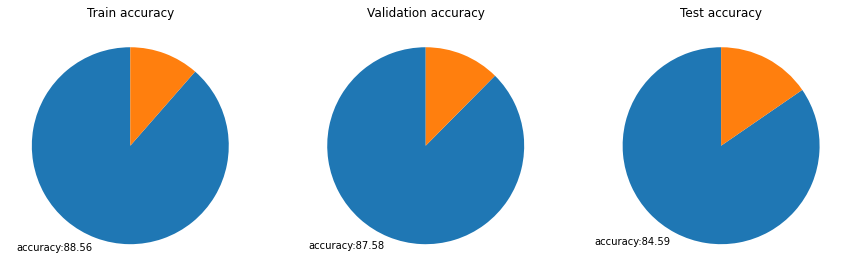

Train accuracy:  0.885603490063015
Validation accuracy:  0.8758239627762698
Test accuracy:  0.8458751624768384


In [ ]:
model = naive_bayes.MultinomialNB()
train_model(model, X_data_tfidf, y_data, X_test_tfidf, y_test, is_neuralnet=False)
filename = 'naive_bayes_MultinomialNB_tfidf.model'
pickle.dump(model, open(MODEL_PATH + filename, 'wb'))

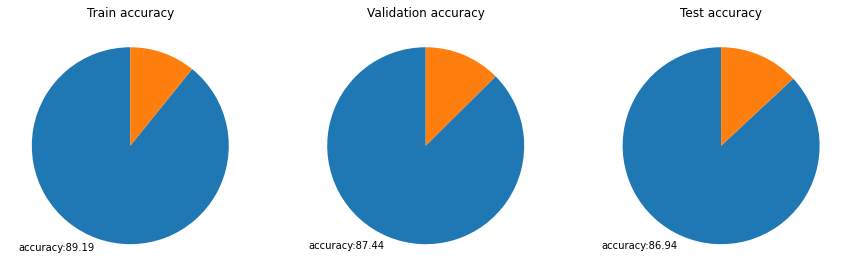

Train accuracy:  0.8919292292777509
Validation accuracy:  0.8743699108181465
Test accuracy:  0.8693547941038192


In [ ]:
model = naive_bayes.MultinomialNB()
train_model(model, X_data_tfidf_ngram, y_data, X_test_tfidf_ngram, y_test, is_neuralnet=False)
filename = 'naive_bayes_MultinomialNB_tfidf_ngram.model'
pickle.dump(model, open(MODEL_PATH + filename, 'wb'))

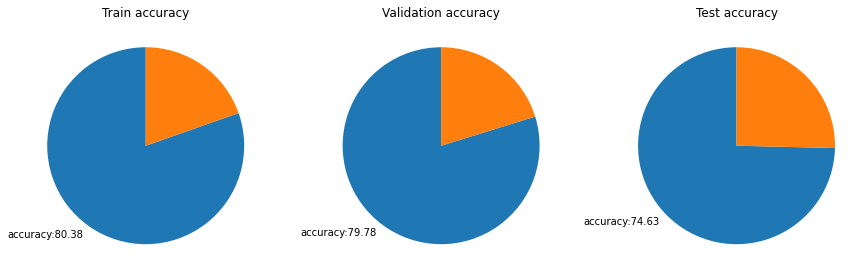

Train accuracy:  0.8037566650508967
Validation accuracy:  0.7977898410236526
Test accuracy:  0.746259575762604


In [ ]:
model = naive_bayes.MultinomialNB()
train_model(model, X_data_tfidf_ngram_char, y_data, X_test_tfidf_ngram_char, y_test, is_neuralnet=False)
filename = 'naive_bayes_MultinomialNB_tfidf_ngram_char.model'
pickle.dump(model, open(MODEL_PATH + filename, 'wb'))

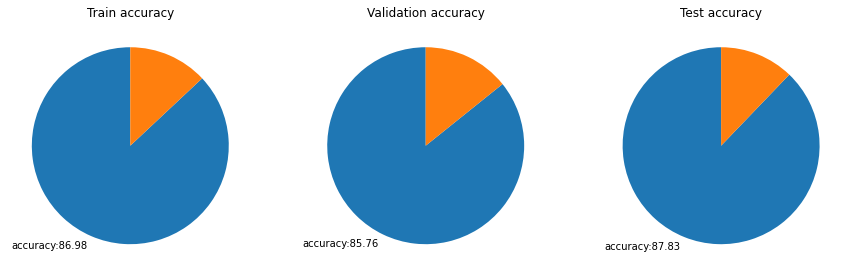

Train accuracy:  0.8698497333979641
Validation accuracy:  0.8575998449011245
Test accuracy:  0.8782875632622583


In [ ]:
model = naive_bayes.BernoulliNB()
train_model(model, X_data_tfidf, y_data, X_test_tfidf, y_test, is_neuralnet=False)
filename = 'naive_bayes_BernoulliNB_tfidf.model'
pickle.dump(model, open(MODEL_PATH + filename, 'wb'))

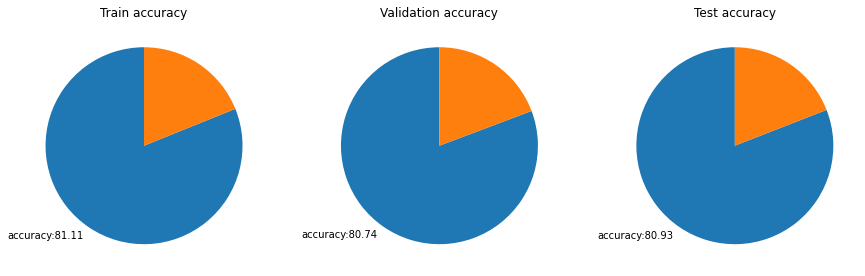

Train accuracy:  0.811100339311682
Validation accuracy:  0.8073865839472664
Test accuracy:  0.8092591056168589


In [ ]:
model = naive_bayes.BernoulliNB()
train_model(naive_bayes.BernoulliNB(), X_data_tfidf_svd, y_data, X_test_tfidf_svd, y_test, is_neuralnet=False)
filename = 'naive_bayes_BernoulliNB_tfidf_svd.model'
pickle.dump(model, open(MODEL_PATH + filename, 'wb'))

## Linear Classifier - Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


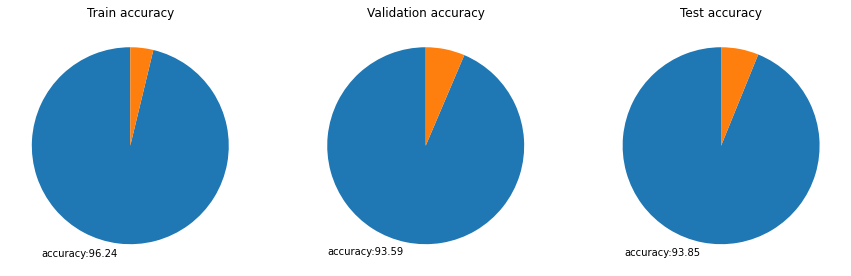

Train accuracy:  0.9623606398448861
Validation accuracy:  0.9359247770453665
Test accuracy:  0.938521529909566


In [ ]:
model = linear_model.LogisticRegression()
train_model(model, X_data_tfidf, y_data, X_test_tfidf, y_test, is_neuralnet=False)
filename = 'linear_LogisticRegression_tfidf.model'
pickle.dump(model, open(MODEL_PATH + filename, 'wb'))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


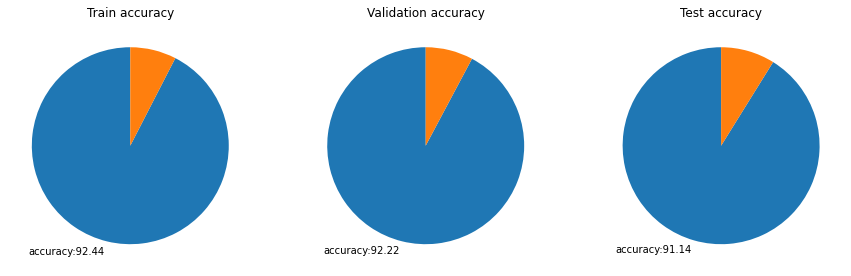

Train accuracy:  0.9243819680077557
Validation accuracy:  0.9221597518417991
Test accuracy:  0.9114466661135541


In [ ]:
model = linear_model.LogisticRegression()
train_model(model, X_data_tfidf_svd, y_data, X_test_tfidf_svd, y_test, is_neuralnet=False)
filename = 'linear_LogisticRegression_tfidf_svd.model'
pickle.dump(model, open(MODEL_PATH + filename, 'wb'))

## Support Vector Machine (SVM)

else


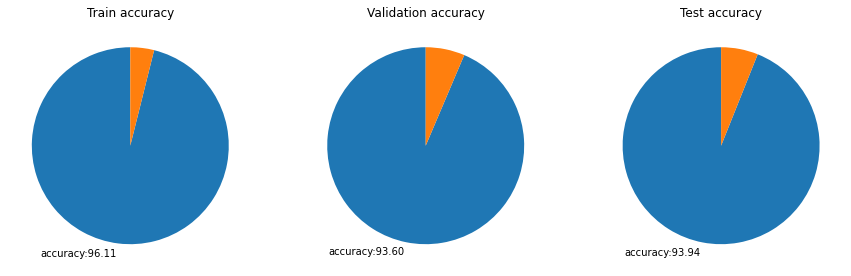

Train accuracy:  0.9610711361971649
Validation accuracy:  0.9360217138425746
Test accuracy:  0.9394065101357891


In [ ]:
model = svm.SVC()
train_model(model, X_data_tfidf_svd, y_data, X_test_tfidf_svd, y_test, is_neuralnet=False)
filename = 'svm_svc_tfidf_svd.model'
pickle.dump(model, open(MODEL_PATH + filename, 'wb'))

## Random forest

else


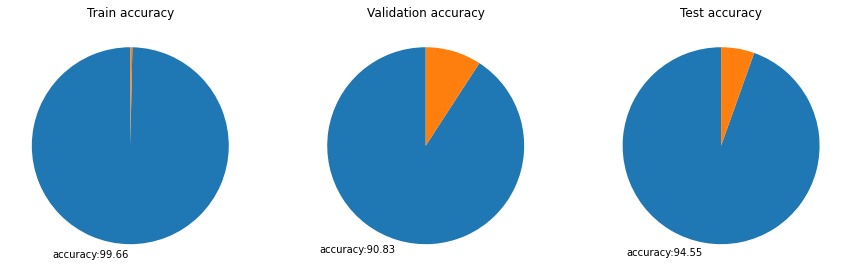

Train accuracy:  0.996617691412814
Validation accuracy:  0.9082977898410236
Test accuracy:  0.9455184048231422


In [ ]:
model = ensemble.RandomForestClassifier()
train_model(model, X_data_tfidf_svd, y_data, X_test_tfidf_svd, y_test, is_neuralnet=False)
filename = 'ensemble_RandomForestClassifier_tfidf_svd.model'
pickle.dump(model, open(MODEL_PATH + filename, 'wb'))

## Boosting Model (XGB)

else


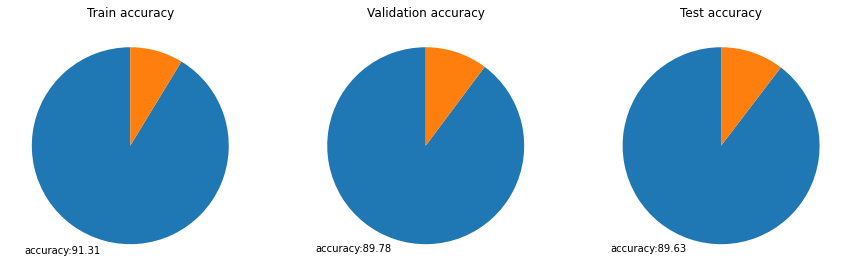

Train accuracy:  0.9130940583394372
Validation accuracy:  0.8978286157425359
Test accuracy:  0.8962637241074145


In [ ]:
model = xgboost.XGBClassifier()
train_model(model, X_data_tfidf_svd, y_data, X_test_tfidf_svd, y_test, is_neuralnet=False)
filename = 'xgboost_XGBClassifier_tfidf_svd.model'
pickle.dump(model, open(MODEL_PATH + filename, 'wb'))

# Test

In [ ]:
test_doc = '''
Lạm dụng bóng cười, cần sa từ tuổi vị thành niên, trong đầu Thảo thường xuất hiện "giọng nói lạ" khiến cô bị kích động tinh thần.

Sáng 10/8, trường hợp bệnh nhân 22 tuổi này được bác sĩ Bùi Nguyễn Hồng Bảo Ngọc, Viện Sức khỏe Tâm thần, Bạch viện Bạch Mai, chia sẻ tại hội thảo về tình trạng sử dụng chất gây nghiện ở thanh thiếu niên.

Thảo ở Vĩnh Phúc, là con út trong gia đình có ba người con, được đánh giá là nhanh nhẹn, hòa đồng. Học hết lớp 12, Thảo đi học nghề thẩm mỹ. Cách đây hơn một năm, cô bắt đầu sử dụng bóng cười và thuốc lắc trong các bữa tiệc với bạn bè, tần suất ban đầu khoảng 3-4 lần/tháng, sau đó tăng 2-3 lần/tuần. Bóng cười là quả bóng được bơm khí N2O - loại khí gây hưng phấn thần kinh, tạo cảm giác muốn cười khi hít vào nên còn được gọi là khí cười.

Kể từ đó, cô gái nghe thấy những tiếng nói lạ trong đầu - là lời chửi mắng của nam lẫn nữ. Thảo hoảng loạn, đập phá đồ đạc và mắng chửi lại tiếng nói đó, được người nhà đưa vào Viện Sức khỏe Tâm thần, Bệnh viện Bạch Mai.

Lần nhập viện đầu tiên, bệnh nhân được chẩn đoán rối loạn tâm thần và hành vi do sử dụng thuốc lắc. Sau điều trị 10 ngày, bệnh ổn định, không còn "tiếng nói lạ" trong đầu, ăn ngủ tốt hơn, Thảo ra viện điều trị ngoại trú kèm trị liệu tâm lý.

Sau ba tháng sau, cô gái lại tham gia tiệc cùng bạn, tiếp tục sử dụng cần sa, ketamine, hút bóng cười. Tình trạng rối loạn tâm thần của Thảo nặng hơn khi liên tục cáu gắt với người thân, bỏ bê công việc, đêm ngủ ít, có lúc cười một mình, xuất hiện nhiều ảo tưởng. Nhập viện lần hai, cô được chẩn đoán rối loạn tâm thần và hành vi do sử dụng đa chất (cần sa, ketamin, N2O). Sau điều trị khoảng 12 ngày, gia đình xin ra viện chữa ngoại trú.

Tuy nhiên, cô gái trẻ không tuân thủ điều trị, không tái khám theo hẹn, không tham gia trị liệu tâm lý chống tái sử dụng chất. Khoảng 2-3 tháng sau, Thảo lại tái sử dụng các chất trên, không chỉ dùng ở những bữa tiệc hay tụ tập với bạn bè, cô còn mua sử dụng tại nhà riêng. Bệnh nhân tiếp tục có các hành vi như đập phá đồ đạc trong nhà, đêm không ngủ, đi lại, đóng chặt cửa, cầm dao vì cho rằng có người "rình rập hại mình".

Hiện, sau một tháng rưỡi điều trị nội trú, Thảo hết hoang tưởng, cảm xúc và hành vi ổn định.

Một bệnh nhân điều trị tại Viện Sức khỏe Tâm thần, Bệnh viện Bạch Mai. Ảnh:Thùy An
Một bệnh nhân điều trị tại Viện Sức khỏe Tâm thần, Bệnh viện Bạch Mai. Ảnh:Thùy An

Cũng sử dụng cần sa và bóng cười, nam sinh 16 tuổi ở Hà Nội, phải điều trị nội trú tại Viện Sức khỏe tâm thần. Ban đầu, em dùng chất gây nghiện để giải tỏa căng thẳng. Tháng 6, kết quả học tập không tốt nên bị bố khiển trách nặng nề, em lén hút cần sa sau đó bị quá liều, co giật, ngộ độc, được đưa vào Bệnh viện Bạch Mai cấp cứu.

Đây là hai ca bệnh điển hình trong rất nhiều trường hợp trẻ tuổi vị thành niên sử dụng chất gây nghiện kéo dài, gây hậu quả nghiêm trọng về sức khỏe, theo bác sĩ Ngọc.

Trước đây, chất gây nghiện chủ yếu là thuốc phiện sau đó thêm heroin, rượu, thuốc lá, thuốc lá điện tử. Hiện nay, chất gây nghiện phong phú hơn với sự xuất hiện của ketamine, thuốc lắc, nấm ảo giác, khí cười... Bên cạnh đó, người chơi còn có xu hướng trộn nhiều loại với nhau, tăng cảm giác kích thích khi sử dụng. Cách đây hai năm, Việt Nam nổi lên nước xoài - một dạng ma túy được đóng bao bì đẹp, giá hai triệu đồng một gói. Tuy nhiên, hiện nước ta chưa có thống kê số liệu đầy đủ về tình trạng trẻ nghiện chất.

Trong khi đó, trên thế giới, công trình của Viện Nghiên cứu Xã hội của Đại học Michigan cho thấy từ năm 2017 đến năm 2019, tỷ lệ thanh thiếu niên Mỹ (độ tuổi lớp 8, 10, 12) hút thuốc trong 12 tháng qua tăng gần gấp đôi. 8% học sinh lớp 8, 19% học sinh lớp 10 và 22% học sinh lớp 12 sử dụng cần sa. Mỗi năm, tại Mỹ có 15 trường hợp chết vì bóng cười; còn tại Anh, từ năm 2006 đến 2012 có 17 ca thiệt mạng.

Theo các bác sĩ, nguyên nhân khiến trẻ nghiện chất có yếu tố môi trường như tương tác xã hội, stress, gia đình và về sinh lý như gene, giới tính. "Khi lạm dụng chất gây nghiện sẽ làm biến đổi chất dẫn truyền tế bào não, dẫn đến suy giảm trí nhớ, mất ngủ, rối loạn tình dục, rối loạn hành vi...", bác sĩ Ngọc nói.

Tiến sĩ Lê Thu Hà, Viện Sức khỏe Tâm thần, nhấn mạnh sử dụng chất gây nghiện ảnh hưởng lớn đến mối quan hệ xã hội và cơ thể. Theo đó, về quan hệ xã hội, người bệnh bị người xung quanh xa lánh, từ đó làm gia tăng cô đơn, lo âu, trầm cảm... và sẽ càng dùng chất nhiều hơn.

Tiến sĩ Hà cảnh báo cần xác định việc trẻ vị thành niên sử dụng chất và giải quyết càng sớm càng tốt. Gia đình đóng vai trò rất quan trọng trong quá trình này. Theo đó, khi phát hiện trẻ sử dụng chất gây nghiện, bố mẹ cần tỏ rõ quan điểm, đồng hành để thay đổi hành vi của con. Trẻ sử dụng chất gây nghiện chủ yếu do stress hoặc muốn thể hiện bản thân.

"Vì vậy, gia đình cần theo dõi, giải quyết những vấn đề của trẻ, để con từ bỏ và không tái sử dụng chất gây nghiện", bác sĩ nói.
'''

In [ ]:
test_doc = preprocessing_doc(test_doc)
# test_vec = get_word2vec_data([test_doc])

In [ ]:
test_doc_tfidf = tfidf_vect.transform([test_doc])
print(np.shape(test_doc_tfidf))
test_doc_svd = svd.transform(test_doc_tfidf)
print(np.shape(test_doc_svd))

(1, 30000)


In [ ]:
MODEL_PATH = '/content/drive/MyDrive/0ML/phanloaitailieu/Text Classifier/model/'
# filename = 'naive_bayes_MultinomialNB_tfidf.model'
# filename = 'naive_bayes_MultinomialNB_tfidf_ngram.model'
# filename = 'naive_bayes_MultinomialNB_tfidf_ngram_char.model'
# filename = 'naive_bayes_BernoulliNB_tfidf.model'
# filename = 'naive_bayes_BernoulliNB_tfidf_svd.model'
# filename = 'linear_LogisticRegression_tfidf.model'
# filename = 'linear_LogisticRegression_tfidf_svd.model'
# filename = 'svm_svc_tfidf_svd.model'
# filename = 'ensemble_RandomForestClassifier_tfidf_svd.model'
filename = 'xgboost_XGBClassifier_tfidf_svd.model'


loaded_model = pickle.load(open(MODEL_PATH + filename, 'rb'))
# print(loaded_model.predict(test_doc_tfidf))
print(loaded_model.predict(test_doc_svd))
# result = loaded_model.score(X_test, y_test)
# print(result)